In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
#importanto os algoritmos
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
todos_os_pokemons = pd.read_csv('input/Pokemon.csv')

In [3]:
gen1 = todos_os_pokemons[:167]
pokemons = todos_os_pokemons[167:]

In [4]:
todos_os_pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
gen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
#             167 non-null int64
Name          167 non-null object
Type 1        167 non-null object
Type 2        78 non-null object
Total         167 non-null int64
HP            167 non-null int64
Attack        167 non-null int64
Defense       167 non-null int64
Sp. Atk       167 non-null int64
Sp. Def       167 non-null int64
Speed         167 non-null int64
Generation    167 non-null int64
Legendary     167 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 15.9+ KB


In [6]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 167 to 799
Data columns (total 13 columns):
#             633 non-null int64
Name          633 non-null object
Type 1        633 non-null object
Type 2        336 non-null object
Total         633 non-null int64
HP            633 non-null int64
Attack        633 non-null int64
Defense       633 non-null int64
Sp. Atk       633 non-null int64
Sp. Def       633 non-null int64
Speed         633 non-null int64
Generation    633 non-null int64
Legendary     633 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 60.0+ KB


In [7]:
dataSet = [pokemons, gen1]

Certamente o status que MAIS vai influenciar se um pokemon é lendario ou nao é o total do seus status, vamos dar
uma olhada aqui no que temos kkk

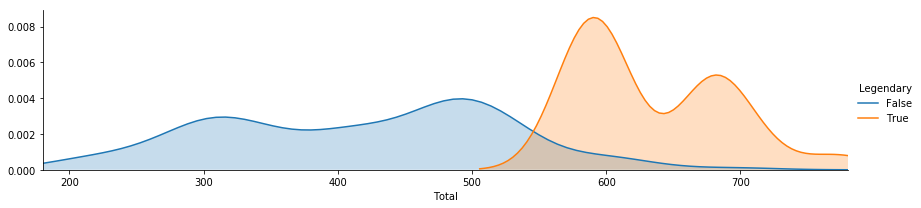

In [8]:
facet = seaborn.FacetGrid(pokemons, hue="Legendary", aspect=4)
facet.map(seaborn.kdeplot, 'Total', shade= True)
facet.set(xlim=(pokemons['Total'].min(),pokemons['Total'].max()))
facet.add_legend()
plt.show()

In [9]:
 for data in dataSet:
    data.loc[data['Total'] < 200, 'Total'] = 0,
    data.loc[(data['Total'] >= 200) & (data['Total'] < 300),'Total'] = 1
    data.loc[(data['Total'] >= 300) & (data['Total'] < 400),'Total'] = 2
    data.loc[(data['Total'] >= 400) & (data['Total'] < 500),'Total'] = 3
    data.loc[(data['Total'] >= 500) & (data['Total'] < 600),'Total'] = 4
    data.loc[(data['Total'] >= 600) & (data['Total'] < 700),'Total'] = 5
    data.loc[data['Total'] >= 700,'Total'] = 6
    

/home/kyouma/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
pokemons.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
167,153,Bayleef,Grass,NaN,3,60,62,80,63,80,60,2,False
168,154,Meganium,Grass,NaN,4,80,82,100,83,100,80,2,False
169,155,Cyndaquil,Fire,NaN,2,39,52,43,60,50,65,2,False
170,156,Quilava,Fire,NaN,3,58,64,58,80,65,80,2,False
171,157,Typhlosion,Fire,NaN,4,78,84,78,109,85,100,2,False


entao, aqui a gente consegue observar que aparenta haver uma relação entre o ataque do pokemon e ele ser lendario ou
nao, porem deve ser usado com cautela, pois pokemons lendarios podem ter ataques relativamente baixos, por variarem
em status, mas podendo compensar em outros status, como defesa.

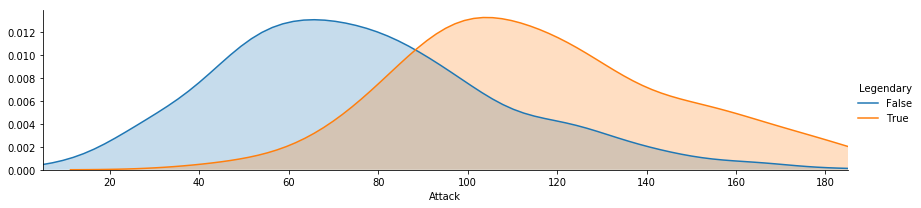

In [11]:
facet = seaborn.FacetGrid(pokemons, hue="Legendary", aspect=4)
facet.map(seaborn.kdeplot, 'Attack', shade= True)
facet.set(xlim=(pokemons['Attack'].min(),pokemons['Attack'].max()))
facet.add_legend()
plt.show()

In [12]:
status = ['Attack', 'HP', 'Defense','Sp. Atk','Sp. Def', 'Speed']

In [13]:
def corrige(feature):
    for data in dataSet:
        data.loc[data[feature] < 30, feature] = 0,
        data.loc[(data[feature] >= 30) & (data[feature] < 60),feature] = 1
        data.loc[(data[feature] >= 60) & (data[feature] < 90),feature] = 2
        data.loc[(data[feature] >= 90) & (data[feature] < 120),feature] = 3
        data.loc[(data[feature] >= 120) & (data[feature] < 150),feature] = 4
        data.loc[(data[feature] >= 150) & (data[feature] < 180),feature] = 5
        data.loc[data[feature] >= 180,feature] = 6

In [14]:
for stat in status:
    corrige(stat)

In [15]:
pokemons.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
167,153,Bayleef,Grass,NaN,3,2,2,2,2,2,2,2,False
168,154,Meganium,Grass,NaN,4,2,2,3,2,3,2,2,False
169,155,Cyndaquil,Fire,NaN,2,1,1,1,2,1,2,2,False
170,156,Quilava,Fire,NaN,3,1,2,1,2,2,2,2,False
171,157,Typhlosion,Fire,NaN,4,2,2,2,3,2,3,2,False


por hora n sei como lidar com os pokemons que n tem 2 tipos, apesar de que pode acabar sendo uma informação util
por hora vou so dropar esses dados.

In [16]:
dropss = ['Name', 'Type 1', 'Type 2']
gen1 = gen1.drop(dropss, axis=1)
pokemons = pokemons.drop(dropss, axis=1)


In [17]:
gen1.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,2,1,1,1,2,2,1,1,False
1,2,3,2,2,2,2,2,2,1,False
2,3,4,2,2,2,3,3,2,1,False
3,3,5,2,3,4,4,4,2,1,False
4,4,2,1,1,1,2,1,2,1,False


In [18]:
target = pokemons['Legendary']
pokemonsSemResposta = pokemons.drop(['Legendary'], axis=1)

In [19]:
divisoes = 10
embaralhado = True
random_state = 0
k_fold = KFold(divisoes, embaralhado, random_state)

In [20]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring= 'accuracy'
score = cross_val_score(clf, pokemonsSemResposta, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para KNeighbors')
score.mean()

Score para KNeighbors


0.9654265873015874

In [21]:
clf = SVC()
scoring= 'accuracy'
score = cross_val_score(clf, pokemonsSemResposta, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para SVM')
score.mean()

Score para SVM


0.970014880952381

In [22]:
clf = DecisionTreeClassifier()
scoring= 'accuracy'
score = cross_val_score(clf, pokemonsSemResposta, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para DecisionTree')
score.mean()

Score para DecisionTree


0.9369295634920635

In [23]:
clf = RandomForestClassifier(n_estimators = 13)
scoring= 'accuracy'
score = cross_val_score(clf, pokemonsSemResposta, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para RandomForest')
score.mean()

Score para RandomForest


0.9526537698412698

In [24]:
clf = GaussianNB()
scoring= 'accuracy'
score = cross_val_score(clf, pokemonsSemResposta, target, cv=k_fold, n_jobs=1,scoring=scoring)
print ('Score para GaussianNB')
score.mean()

Score para GaussianNB


0.9243055555555555

In [25]:
respostasGeral = gen1['Legendary']
test_data = gen1.drop(['Legendary'],axis=1)


In [26]:
clf = SVC()
clf.fit(pokemonsSemResposta, target)
prediction = clf.predict(test_data)


In [27]:
gen1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
#             167 non-null int64
Total         167 non-null int64
HP            167 non-null int64
Attack        167 non-null int64
Defense       167 non-null int64
Sp. Atk       167 non-null int64
Sp. Def       167 non-null int64
Speed         167 non-null int64
Generation    167 non-null int64
Legendary     167 non-null bool
dtypes: bool(1), int64(9)
memory usage: 12.0 KB


In [28]:
resposta = pd.DataFrame(
    {'#':gen1['#'],
     'Legendary':prediction})

In [31]:
resposta.head(167)

,#,Legendary
0,1,False
1,2,False
2,3,False
3,3,False
4,4,False
5,5,False
6,6,False
7,6,False
8,6,False
9,7,False


entao, deu errado, ele aparentemente so ta chutando tudo false,e por ter muito mais nao lendario do que lendario da um acerto relativamente grande